In [40]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt


In [41]:
import pennylane as qml
from pennylane import numpy as np

n_wires = 4
dev = qml.device("default.qubit", wires=n_wires, shots=1)

def add_k_fourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

In [42]:
wires_m = [0, 1, 2]           # qubits needed to encode m
wires_k = [3, 4, 5]           # qubits needed to encode k
wires_solution = [6, 7, 8, 9, 10]  # qubits needed to encode the solution

dev = qml.device("default.qubit", wires=wires_m + wires_k + wires_solution, shots=1)

n_wires = len(dev.wires)


The ket representation of the multiplication of 7 and 7 is [0 1]


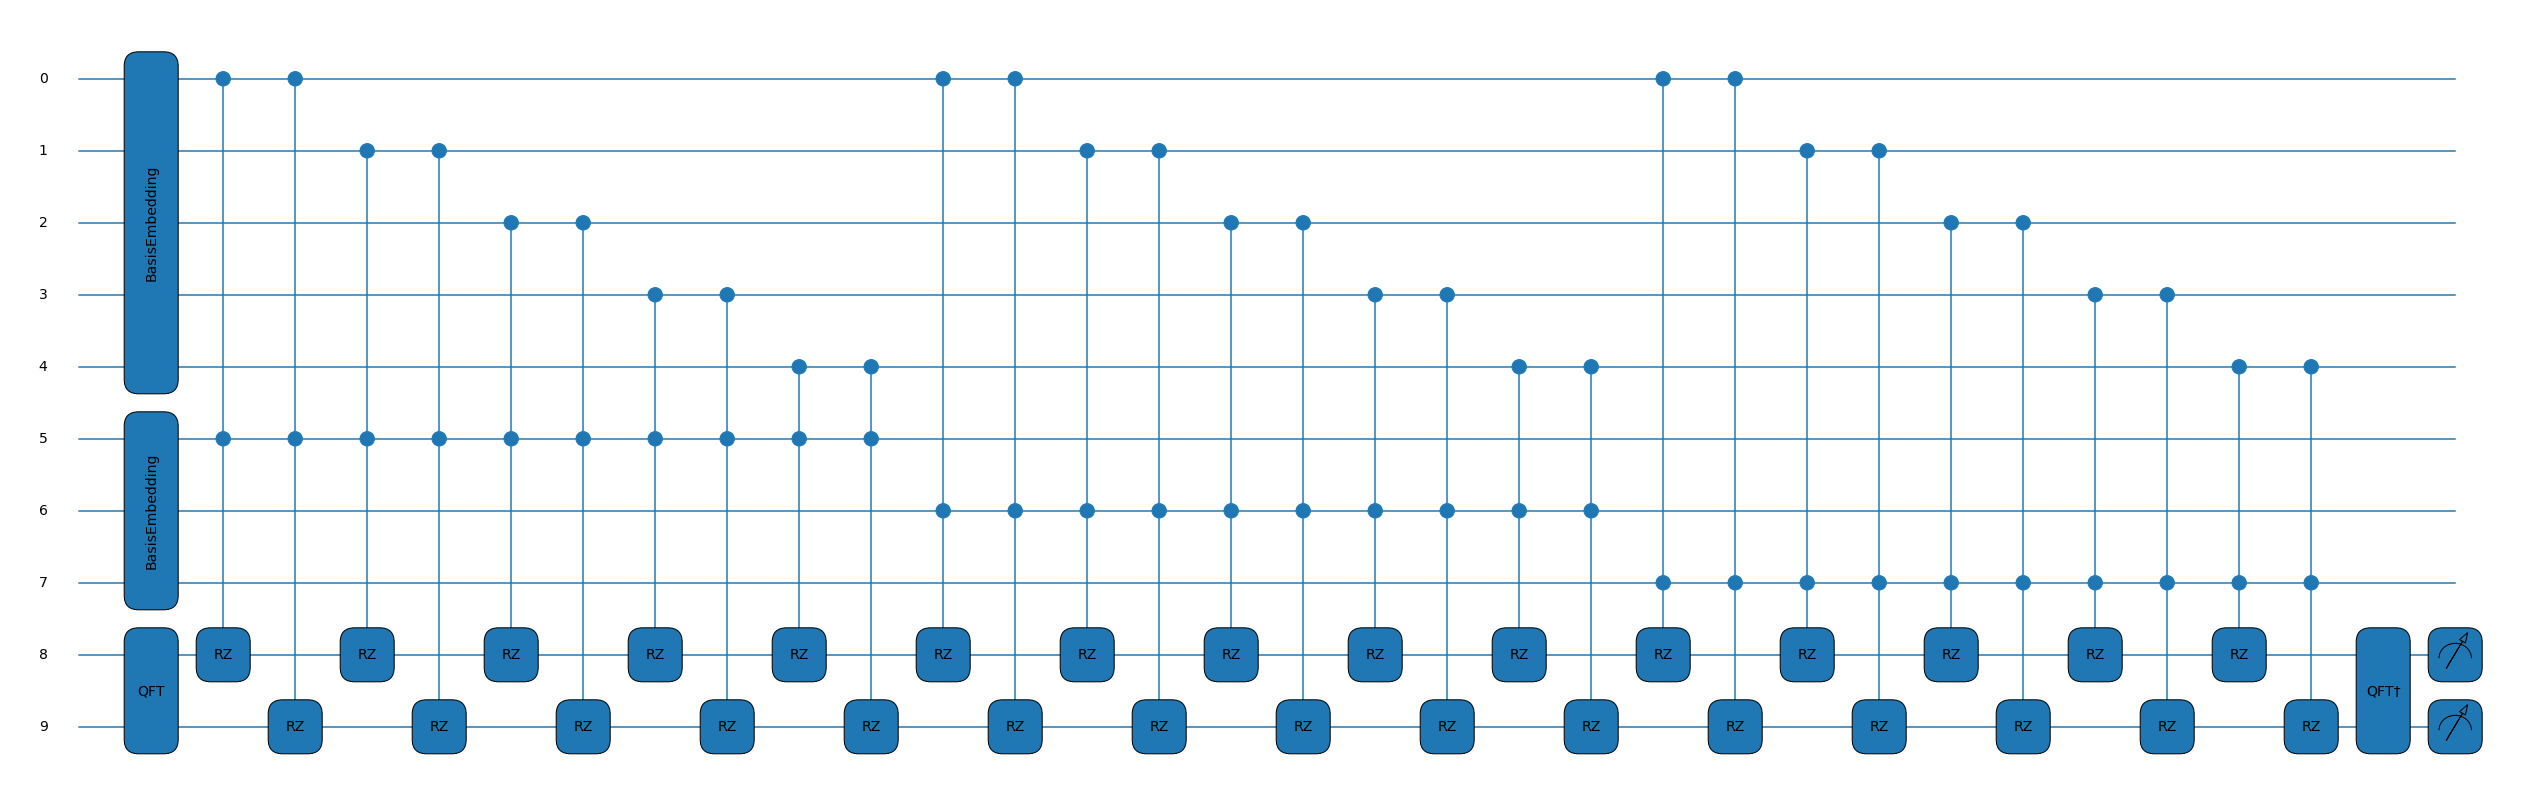

In [43]:
def multiplication(wires_m, wires_k, wires_solution):
    # prepare sol-qubits to counting
    qml.QFT(wires=wires_solution)

    # add m to the counter
    for i in range(len(wires_k)):
        for j in range(len(wires_m)):
            coeff = 2 ** (len(wires_m) + len(wires_k) - i - j - 2)
            qml.ctrl(add_k_fourier, control=[wires_k[i], wires_m[j]])(coeff, wires_solution)

    # return to computational basis
    qml.adjoint(qml.QFT)(wires=wires_solution)

@qml.qnode(dev)
def mul(m, k):
    # m and k codification
    qml.BasisEmbedding(m, wires=wires_m)
    qml.BasisEmbedding(k, wires=wires_k)

    # Apply multiplication
    multiplication(wires_m, wires_k, wires_solution)

    return qml.sample(wires=wires_solution)


print(f"The ket representation of the multiplication of 7 and 7 is {mul(7,7)}")

qml.draw_mpl(mul, show_all_wires=True)(7, 7)
plt.show()